In [124]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification
import random

In [125]:
X , y = make_classification(n_features=5 , n_redundant=0 , n_informative=5 , n_clusters_per_class=1)


In [126]:
df = pd.DataFrame( X , columns=['col1' , 'col2' , 'col3' , 'co4' ,'vol5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,co4,vol5,target
0,1.110114,-2.658670,-2.876069,0.359892,-0.203822,1
1,1.616938,1.702106,-0.477733,-0.241009,-2.018576,0
2,-1.336516,-0.220052,-1.320948,0.655780,-3.383555,1
3,1.027939,0.077661,-0.576006,1.363344,-1.591696,1
4,1.522187,0.673158,-1.329040,-0.039472,-0.842985,0


In [127]:
#function for row sampling 
def sample_rows(df , percent):
    return df.sample(int(percent * df.shape[0]) ,replace=True)
    

In [128]:
#function for feature sampling 
def sample_features(df , percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]))
    return df[cols]

In [129]:
# function of combined sampling 
def combined_sampling(df , row_percent, col_percent):
    new_df = sample_rows(df ,row_percent)
    return sample_features(new_df , col_percent)

# sample_rows

In [130]:
df1 = sample_rows(df , 0.2)

In [131]:
df2 = sample_rows(df , 0.2)

In [132]:
df3 = sample_rows(df , 0.2)

In [133]:
df1.shape

(20, 6)

In [134]:
df2.shape

(20, 6)

In [135]:
df3.shape

(20, 6)

In [136]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [137]:
clf1.fit(df1.iloc[: ,0:5] , df1.iloc[: ,-1])
clf2.fit(df2.iloc[: ,0:5] , df2.iloc[: ,-1])
clf3.fit(df3.iloc[: ,0:5] , df3.iloc[: ,-1])

DecisionTreeClassifier()

In [138]:
from sklearn.tree import plot_tree 


[Text(0.5, 0.9, 'x[3] <= 0.254\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 3.754\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.5, 0.5, 'x[4] <= -0.605\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= 1.82\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

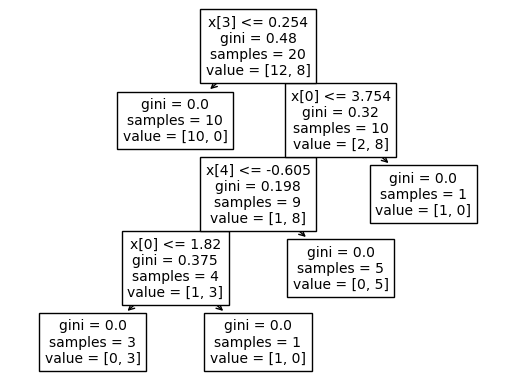

In [139]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.875, 'x[0] <= 0.903\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.625, 'x[3] <= 0.35\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= -1.19\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

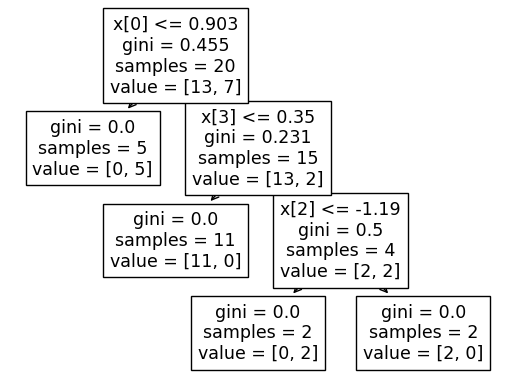

In [140]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[3] <= 0.214\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]')]

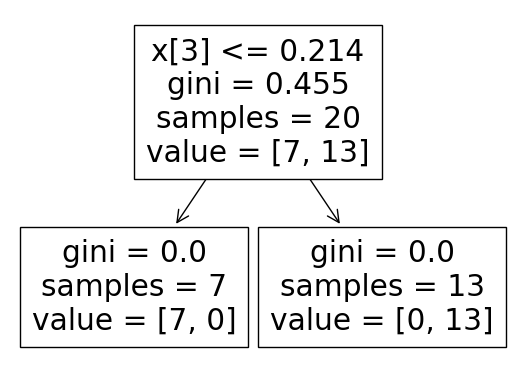

In [141]:
plot_tree(clf3)

In [142]:
0.305082,-1.316564,1.714833,-0.186805,-0.836213

(0.305082, -1.316564, 1.714833, -0.186805, -0.836213)

In [143]:
clf1.predict(np.array([0.305082,-1.316564,1.714833,-0.186805,-0.836213]).reshape(1,5))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [144]:
clf2.predict(np.array([0.305082,-1.316564,1.714833,-0.186805,-0.836213]).reshape(1,5))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [145]:
clf3.predict(np.array([0.305082,-1.316564,1.714833,-0.186805,-0.836213]).reshape(1,5))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# sample_features

In [146]:
df1 = sample_features(df , 0.1)

In [147]:
df2 = sample_features(df , 0.5)

In [148]:
df3 = sample_features(df , 0.5)
df3

,vol5,co4,col1
0,-0.203822,0.359892,1.110114
1,-2.018576,-0.241009,1.616938
2,-3.383555,0.655780,-1.336516
3,-1.591696,1.363344,1.027939
4,-0.842985,-0.039472,1.522187
...,...,...,...
95,-1.414272,-0.739455,2.038854
96,-0.195876,1.117428,1.512331
97,-0.929371,0.488778,0.795080
98,-1.680106,0.450261,-0.015165


# combined_sampling

In [150]:
combined_sampling(df ,0.4 , 0.2)

,col3
8,-1.825210
60,-1.471031
75,0.101654
10,-1.863294
86,1.636137
93,-0.881982
89,-0.959663
9,-0.941692
46,-0.836754
34,-0.673240
